## Clustering Analysis

#### Using the City of Scottsdale Vendor Payments [dataset](http://data.scottsdaleaz.gov/dataset/vendor-payments) and performing time series analysis, many vendors receive payments from the city at regular intervals throughout the year(monthly, weekly, daily).  In contrast to these vendors, I'm interested in identifying vendors who receive payments within compressed time spans during the year?

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

vendor_payments = pd.read_csv('data/Scottsdale/ct_VendorPayments.csv')
vendor_payments['PaymentDate'] = pd.to_datetime(vendor_payments['PaymentDate'])
vendor_payments['Month'] = vendor_payments['PaymentDate'].dt.month
vendor_payments['Day_of_Year'] = vendor_payments['PaymentDate'].dt.dayofyear

# convert datetime to a number to be able to find mean payment for each vendor
vendor_payments['Payment_Date_Numeric'] = pd.to_datetime(vendor_payments['PaymentDate']).values.astype(np.int64)

In [120]:
vendor_payments.shape

(23612, 14)

### Preprocess the data

In [121]:
vendor_payments.dtypes

PaymentDate             datetime64[ns]
VendorName                      object
PaymentAmount                  float64
Fund                             int64
FundDescription                 object
Center                          object
CenterName                      object
Account                          int64
AccountName                     object
FiscalYear                       int64
AccountingPeriod                 int64
Month                            int64
Day_of_Year                      int64
Payment_Date_Numeric             int64
dtype: object

In [122]:
# find the average payment date for each vendor
avg_payment_date_by_vendor = vendor_payments.groupby('VendorName')['Payment_Date_Numeric'] \
    .mean().to_frame().rename(columns={'Payment_Date_Numeric': 'Payment_Date_Avg'})

avg_payment_date_by_vendor.head()


# df.rename(index=str, columns={"A": "a", "C": "c"})

,Payment_Date_Avg
VendorName,
1 800 RADIATOR,1510822800000000000
1800 RADIATOR,1525867200000000000
232 RANCH LLC,1518739200000000000
3M,1511928000000000000
4IMPRINT INC,1518614400000000000


In [123]:
vendor_payments.shape

(23612, 14)

In [124]:
# find the count of payments for each vendor
count_vendor_payments_by_vendor = vendor_payments.groupby('VendorName')['Payment_Date_Numeric'] \
.count().to_frame().rename(columns={'Payment_Date_Numeric': 'Payment_Count'})

count_vendor_payments_by_vendor.head()
# head()

,Payment_Count
VendorName,
1 800 RADIATOR,8
1800 RADIATOR,2
232 RANCH LLC,1
3M,6
4IMPRINT INC,9


In [125]:
# merge vendor date averages with vendor payments
vendor_payments = pd.merge(vendor_payments, avg_payment_date_by_vendor, on='VendorName')
vendor_payments.head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Month,Day_of_Year,Payment_Date_Numeric,Payment_Date_Avg
0,2017-08-14,A TO Z EQUIPMENT RENTAL & SALES,1021.38,200,TRANSPORTATION,20860,TRAFFIC SIGNALS,53790,"MAT TO MAINT & REPAIR MACH, EQUIP",2018,2,8,226,1502668800000000000,1516583314285714176
1,2017-08-22,A TO Z EQUIPMENT RENTAL & SALES,1476.96,230,GRANTS,36209,SRP-MIC FY16/17 MUNOZ-VILLAFAN,53090,OTHER OPERATING SUPPLIES,2018,2,8,234,1503360000000000000,1516583314285714176
2,2017-09-29,A TO Z EQUIPMENT RENTAL & SALES,2125.48,600,WATER,29201,WATER DISTRIBUTION,53720,SMALL TOOLS & EQUIPMENT,2018,3,9,272,1506643200000000000,1516583314285714176
3,2017-10-02,A TO Z EQUIPMENT RENTAL & SALES,288.08,100,GENERAL,20907,CONSTRUCTION SERVICES,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,4,10,275,1506902400000000000,1516583314285714176
4,2017-10-11,A TO Z EQUIPMENT RENTAL & SALES,579.66,600,WATER,29201,WATER DISTRIBUTION,53794,MAT TO MAINT AND REPAIR MECH SYS,2018,4,10,284,1507680000000000000,1516583314285714176


In [128]:
# merge vendor payment counts with vendor payments
vendor_payments = pd.merge(vendor_payments, count_vendor_payments_by_vendor, on='VendorName')
vendor_payments.head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Month,Day_of_Year,Payment_Date_Numeric,Payment_Date_Avg,Payment_Count
0,2017-08-14,A TO Z EQUIPMENT RENTAL & SALES,1021.38,200,TRANSPORTATION,20860,TRAFFIC SIGNALS,53790,"MAT TO MAINT & REPAIR MACH, EQUIP",2018,2,8,226,1502668800000000000,1516583314285714176,21
1,2017-08-22,A TO Z EQUIPMENT RENTAL & SALES,1476.96,230,GRANTS,36209,SRP-MIC FY16/17 MUNOZ-VILLAFAN,53090,OTHER OPERATING SUPPLIES,2018,2,8,234,1503360000000000000,1516583314285714176,21
2,2017-09-29,A TO Z EQUIPMENT RENTAL & SALES,2125.48,600,WATER,29201,WATER DISTRIBUTION,53720,SMALL TOOLS & EQUIPMENT,2018,3,9,272,1506643200000000000,1516583314285714176,21
3,2017-10-02,A TO Z EQUIPMENT RENTAL & SALES,288.08,100,GENERAL,20907,CONSTRUCTION SERVICES,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,4,10,275,1506902400000000000,1516583314285714176,21
4,2017-10-11,A TO Z EQUIPMENT RENTAL & SALES,579.66,600,WATER,29201,WATER DISTRIBUTION,53794,MAT TO MAINT AND REPAIR MECH SYS,2018,4,10,284,1507680000000000000,1516583314285714176,21


In [129]:
# find difference from mean date for each vendor payment
vendor_payments['Date_Dif'] = abs(vendor_payments['Payment_Date_Avg'] - vendor_payments['Payment_Date_Numeric'])

In [130]:
vendor_payments.sort_values(by='Date_Dif', ascending=False).head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Month,Day_of_Year,Payment_Date_Numeric,Payment_Date_Avg,Payment_Count,Date_Dif
8068,2017-08-18,BIBLIOTHECA LLC,72578.00,100,GENERAL,25603,LIBRARY SYSTEMS,52340,"MAINTENANCE, OFF EQUIP & FURNITURE",2018,2,8,230,1503014400000000000,1526100480000000000,5,23086080000000000
18795,2017-09-25,RITOCH-POWELL & ASSOCIATES,658.38,410,CIP TRANSPORTATION PRIVILEGE TAX,TB57A,HAYDEN/THOMAS SAFETY IMP,56047,DSGN - ENGINEERING SERVICES,2018,3,9,268,1506297600000000000,1527573600000000000,8,21276000000000000
11069,2018-07-13,COMPRESSED AIR POWER INC,693.28,100,GENERAL,20905,HVAC MAINTENANCE,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2019,1,7,194,1531440000000000000,1510168320000000000,5,21271680000000000
9866,2018-08-07,UCT LLC,565.81,603,WATER RECLAMATION,29470,WATER RECLAMATION LABORATORY,53040,CHEMICALS & LABORATORY SUPPLIES,2019,2,8,219,1533600000000000000,1513244160000000000,5,20355840000000000
16521,2017-09-06,AT&T MOBILITY,33936.25,100,GENERAL,27501,NETWORK OPERATIONS,52350,SOFTWARE MAINT & LICENSING,2018,3,9,249,1504656000000000000,1524852000000000000,4,20196000000000000


In [132]:
# reduce vendor payments to only vendors with more than 10 payments during the year
vendor_payments = vendor_payments[vendor_payments['Payment_Count'] >= 10]

vendor_payments.head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Month,Day_of_Year,Payment_Date_Numeric,Payment_Date_Avg,Payment_Count,Date_Dif
0,2017-08-14,A TO Z EQUIPMENT RENTAL & SALES,1021.38,200,TRANSPORTATION,20860,TRAFFIC SIGNALS,53790,"MAT TO MAINT & REPAIR MACH, EQUIP",2018,2,8,226,1502668800000000000,1516583314285714176,21,13914514285714176
1,2017-08-22,A TO Z EQUIPMENT RENTAL & SALES,1476.96,230,GRANTS,36209,SRP-MIC FY16/17 MUNOZ-VILLAFAN,53090,OTHER OPERATING SUPPLIES,2018,2,8,234,1503360000000000000,1516583314285714176,21,13223314285714176
2,2017-09-29,A TO Z EQUIPMENT RENTAL & SALES,2125.48,600,WATER,29201,WATER DISTRIBUTION,53720,SMALL TOOLS & EQUIPMENT,2018,3,9,272,1506643200000000000,1516583314285714176,21,9940114285714176
3,2017-10-02,A TO Z EQUIPMENT RENTAL & SALES,288.08,100,GENERAL,20907,CONSTRUCTION SERVICES,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,4,10,275,1506902400000000000,1516583314285714176,21,9680914285714176
4,2017-10-11,A TO Z EQUIPMENT RENTAL & SALES,579.66,600,WATER,29201,WATER DISTRIBUTION,53794,MAT TO MAINT AND REPAIR MECH SYS,2018,4,10,284,1507680000000000000,1516583314285714176,21,8903314285714176


In [191]:
# divide sum of vendor date differences by transaction counts for each vendor
dif_dates_aggregated = vendor_payments.groupby('VendorName')['Date_Dif'].sum().to_frame()

vendor_payments_count = vendor_payments.groupby('VendorName')['Date_Dif'].count().to_frame()
    

# merge vendor payment counts with vendor payments
vendors_clustered = pd.merge(dif_dates_aggregated, vendor_payments_count, left_index=True, right_index=True)
vendors_clustered['cluster_score'] = vendors_clustered['Date_Dif_x']/vendors_clustered['Date_Dif_y']

top_clustered_vendors = vendors_clustered.sort_values(by='cluster_score', ascending=True)
top_clustered_vendors.head()

,Date_Dif_x,Date_Dif_y,cluster_score
VendorName,,,
AZ WATER ASSOCIATION,0,14,0.000000e+00
AMERICAN PUBLIC WORKS ASSOC,0,10,0.000000e+00
LOFTIN EQUIPMENT CO,2880000000000000,12,2.400000e+14
LN CURTIS & SONS,13962240000000000,10,1.396224e+15
SOMERSET LANDSCAPE,48614400000001280,33,1.473164e+15


In [223]:
# subset data based on top 10 vendors from cluster analysis

top_clustered_vendors_data = vendor_payments[vendor_payments['VendorName'].isin(top_clustered_vendors.head(5).index)]
# top_clustered_vendors_data.loc[:,'PaymentDate'].head()
top_clustered_vendors_data.head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod,Month,Day_of_Year,Payment_Date_Numeric,Payment_Date_Avg,Payment_Count,Date_Dif
3546,2017-08-14,SOMERSET LANDSCAPE,458.38,100,GENERAL,25412,MEDIANS & RIGHT-OF-WAY MAINTENANCE,52323,LANDSCAPING,2018,2,8,226,1502668800000000000,1505601163636363520,33,2932363636363520
3547,2017-08-18,SOMERSET LANDSCAPE,4107.60,458,PRESERVE TAX '04-LAND & IMPRVMTS,PB52A,"RESTORE,HABITAT,FIRE/SAFTY IMP",56081,CONT - LAND IMPROVEMENTS,2018,2,8,230,1503014400000000000,1505601163636363520,33,2586763636363520
3548,2017-08-21,SOMERSET LANDSCAPE,4851.12,100,GENERAL,25401,CIVIC CENTER COMPLEX,52323,LANDSCAPING,2018,2,8,233,1503273600000000000,1505601163636363520,33,2327563636363520
3549,2017-08-21,SOMERSET LANDSCAPE,501.84,100,GENERAL,25404,PROFESSIONAL BASEBALL,52323,LANDSCAPING,2018,2,8,233,1503273600000000000,1505601163636363520,33,2327563636363520
3550,2017-08-21,SOMERSET LANDSCAPE,2675.00,100,GENERAL,25408,STORM DAMAGE REPAIR AND MAINTENANCE,52323,LANDSCAPING,2018,2,8,233,1503273600000000000,1505601163636363520,33,2327563636363520


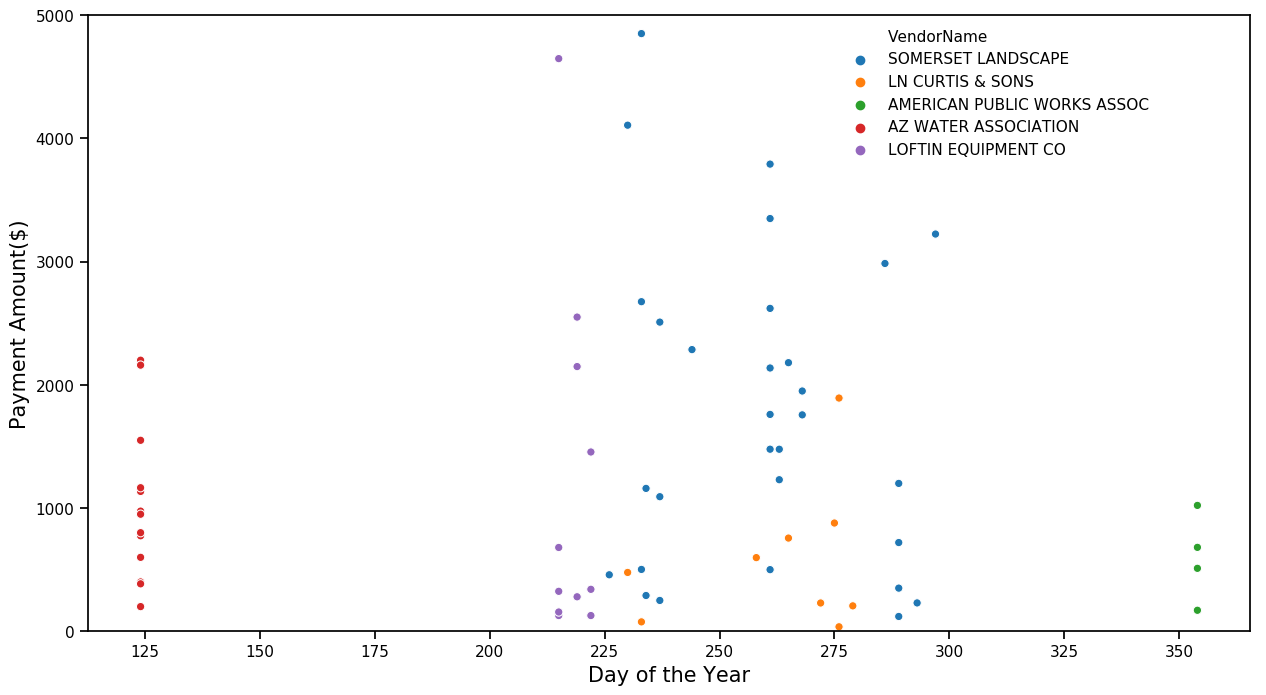

In [224]:
fig = plt.figure(figsize=(15, 8))
ax = sns.color_palette("dark")

# ax = sns.color_palette("bright")


ax = sns.scatterplot(x=top_clustered_vendors_data.loc[:,'Day_of_Year'], 
                y=top_clustered_vendors_data.loc[:,'PaymentAmount'], 
                hue=top_clustered_vendors_data.loc[:,'VendorName'])

# plt.title("xxx")
plt.xlabel("Day of the Year", fontsize=15)
plt.ylabel("Payment Amount($)", fontsize=15)
plt.legend(fontsize=10)


# sns.set_context("notebook", font_scale=1)

plt.ylim(0,5000)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(25))

plt.legend(frameon=False)
plt.savefig("visualizations/top 10 clustered vendors.png")